## Laboratorio de implementacion - Usuarios app

In [2]:
import pandas as pd #importo la librería para trabajar con datos
import numpy as np #importo la librería para procesar matrices
from matplotlib import pyplot as plt #importo las librerías para graficar

### Primer paso: cargamos el archivo y lo exploramos un poco
En el repositorio <a href="https://github.com/andresdambrosio/DMA_LABO_Austral_2021_rosario" title="DMA_LABO_Austral_2021_Rosario">DMA_LABO_Austral_2021_Rosario</a> existe una carpeta `data`. Adentro hay un archivo `usuarioapp.csv`. Cargarlo en la siguiente linea en un file de pandas directamente desde el REPO (no lo descargues)

In [3]:
path='https://raw.githubusercontent.com/andresdambrosio/DMA_LABO_Austral_2021_rosario/main/Data/usuariosapp.csv'
usuarios=pd.read_csv(path,sep=';') #cargo un pandas dataframe con la info del archivo

In [4]:
#veo que hay en los primeros 5 registros del dataframe
usuarios.head()

,UserID,Status,Sexo,DNI
0,1124,A,F,93834031
1,1199,A,F,NaN
2,1420,A,NaN,NaN
3,1684,I,M,5001415
4,1713,A,M,NaN


In [5]:
#Largo del dataset
len(usuarios)

199826

In [6]:
#Cantidad de valores no nulos por columna
usuarios.count()

UserID    199826
Status    199826
Sexo      139980
DNI       103883
dtype: int64

In [7]:
#veo los tipos de cada columna
usuarios.dtypes

UserID     int64
Status    object
Sexo      object
DNI       object
dtype: object

In [8]:
#veo que hay en status
usuarios.Status.unique()

array(['A', 'I'], dtype=object)

In [9]:
#veo que hay en Sexo
usuarios.Sexo.unique()

array(['F', nan, 'M'], dtype=object)

In [11]:
#veo que valores hay en DNI
usuarios.DNI.head(200)

0      93834031
1           NaN
2           NaN
3       5001415
4           NaN
         ...   
195         NaN
196     5042561
197         NaN
198         NaN
199         NaN
Name: DNI, Length: 200, dtype: object

In [12]:
#Veamos el tipo de datos del primer registro
print(usuarios.DNI[0])
print('El tipo de datos es ' , type(usuarios.DNI[0]))

93834031
El tipo de datos es  <class 'str'>


In [13]:
#Intento transforma la columna DNI a números
pd.to_numeric(usuarios.DNI)

ValueError: Unable to parse string "L2000-1325" at position 64

In [14]:
#veamos que hay en la posición 64
usuarios.iloc[64]

UserID         18144
Status             I
Sexo               F
DNI       L2000-1325
Name: 64, dtype: object

In [15]:
#Veamos cuántos registros contienen alguna letra
np.sum(usuarios['DNI'].str.contains('[a-zA-Z]').dropna())

943

In [16]:
#Veamos que hay en las columnas que tienen letra
usuarios[usuarios['DNI'].str.contains('[a-zA-Z]').fillna(False)]

,UserID,Status,Sexo,DNI
64,18144,I,F,L2000-1325
99,26686,A,F,L2001-1299
118,32289,I,NaN,L2001-1250
133,36481,A,NaN,L2000-924
219,58268,A,M,L2000-1101
...,...,...,...,...
199297,49867291,A,NaN,L2000-1013
199398,49891334,I,M,L2001-1154
199643,49955007,A,M,L2000-1067
199746,49980514,I,M,L2001-1072


### ¿Qué hacemos con los nulos?

In [17]:
#Nos quedamos con los que no tienen texto en DNI
usuarios_tf=usuarios[~usuarios['DNI'].str.contains('[a-zA-Z]').fillna(False)]

In [18]:
usuarios_tf

,UserID,Status,Sexo,DNI
0,1124,A,F,93834031
1,1199,A,F,NaN
2,1420,A,NaN,NaN
3,1684,I,M,5001415
4,1713,A,M,NaN
...,...,...,...,...
199821,49998268,A,F,46999504
199822,49998796,A,M,NaN
199823,49998858,A,NaN,47000000
199824,49999487,I,F,NaN


In [19]:
#Me quedo con los que no tienen nulos en DNI
usuarios_tf=usuarios_tf.dropna(subset=['DNI'])

In [20]:
usuarios_tf.DNI=pd.to_numeric(usuarios_tf.DNI) #convierto DNI a número
usuarios_tf.Status=usuarios_tf.Status.convert_dtypes() #convierto Status a string
usuarios_tf.Sexo=usuarios_tf.Sexo.convert_dtypes() #convierto Sexo a string

/Users/adambrosio/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
#Verifico los tipos de datos
usuarios_tf.dtypes

UserID     int64
Status    string
Sexo      string
DNI        int64
dtype: object

In [22]:
#Conteo por columnas, veo que en Sexo hay varios nulos
usuarios_tf.count()

UserID    102940
Status    102940
Sexo       72039
DNI       102940
dtype: int64

In [23]:
#Elimino la columna sexo porque el tp no requiere nada con esa variable
usuarios_tf.drop('Sexo',axis=1,inplace=True)

/Users/adambrosio/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
usuarios_tf.count()

UserID    102940
Status    102940
DNI       102940
dtype: int64

In [25]:
#¿Quedaron nulos?
np.sum(usuarios_tf.isna())

UserID    0
Status    0
DNI       0
dtype: int64

In [27]:
#¿cuántos DNI mayores a 90 millones hay?
np.sum(usuarios_tf.DNI>90000000)

3030

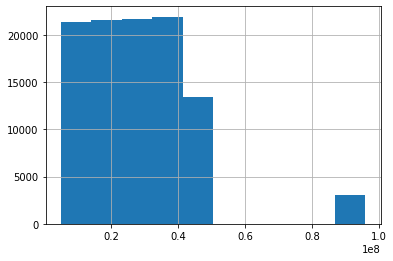

In [26]:
usuarios_tf.DNI.hist()

### ¿Qué hacemos con los outliers en este caso?

In [28]:
#Nos quedamos con los usuarios que no tienen DNI extranjero y con aquellos usuarios que están activos
usuarios_tf=usuarios_tf[usuarios_tf.DNI<90000000]
usuarios_tf=usuarios_tf[usuarios_tf.Status=='A']

In [29]:
#Vemos como nos quedo la base de datos
usuarios_tf.count()

UserID    60184
Status    60184
DNI       60184
dtype: int64

In [30]:
#Calculamos edades
usuarios_tf['Edades']=-0.0000014545*usuarios_tf.DNI+81.3217765310

In [31]:
#Redondeamos a 0 decimales
usuarios_tf.Edades=usuarios_tf.Edades.round(decimals=0)

In [32]:
#Convertimos la columna a enteros
usuarios_tf['Edades']=usuarios_tf['Edades'].astype(np.int64)

In [33]:
#Veamos como quedaron los tipos de las columnas
usuarios_tf.dtypes

UserID     int64
Status    string
DNI        int64
Edades     int64
dtype: object

In [35]:
usuarios_tf.head()

,UserID,Status,DNI,Edades
5,1780,A,5001495,74
10,3970,A,5003335,74
14,4712,A,5003958,74
19,6358,A,5005341,74
20,6805,A,5005716,74


In [36]:
#Armamos rangos de edad
usuarios_tf['rango_edad']=np.select(
    [
        usuarios_tf['Edades'].between(0, 19, inclusive=True), 
        usuarios_tf['Edades'].between(20, 24, inclusive=True),
        usuarios_tf['Edades'].between(25, 29, inclusive=True),
        usuarios_tf['Edades'].between(30, 34, inclusive=True),
        usuarios_tf['Edades'].between(35, 39, inclusive=True),
        usuarios_tf['Edades'].between(40, 44, inclusive=True),
        usuarios_tf['Edades'].between(45, 49, inclusive=True),
        usuarios_tf['Edades'].between(50, 54, inclusive=True),
        usuarios_tf['Edades'].between(55, 59, inclusive=True),
        usuarios_tf['Edades'].between(60, 64, inclusive=True),
        usuarios_tf['Edades'].between(65, 69, inclusive=True),
        usuarios_tf['Edades'].between(70, 74, inclusive=True),
        usuarios_tf['Edades'].between(76, 2000, inclusive=True)
    ],
    [
        '0-20', 
        '20-25',
        '25-30',
        '30-35',
        '35-40',
        '40-45',
        '45-50',
        '50-55',
        '55-60',
        '60-65',
        '65-70',
        '70-75',
        '75'        
    ], 
    default='Unknown'
)

In [37]:
#Armamos una tabla pivot
pd.pivot_table(usuarios_tf,values='Edades',index=['rango_edad'],aggfunc='count').sort_values(by='rango_edad')

,Edades
rango_edad,
0-20,6508
20-25,4968
25-30,4979
30-35,4955
35-40,4987
40-45,4868
45-50,4869
50-55,4916
55-60,4916


In [38]:
#Exportamos los resultados a un excel para graficar
usuarios_tf.to_excel('test.xlsx')

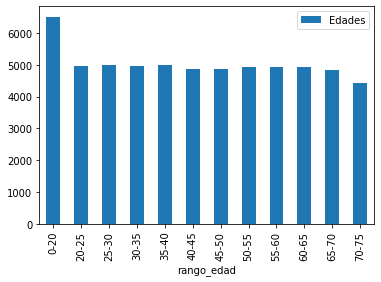

In [39]:
#Armamos una tabla pivot
pd.pivot_table(usuarios_tf,values='Edades',index=['rango_edad'],aggfunc='count').plot(kind='bar')